In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Cargar los datos como DataFrame
iris = load_iris(as_frame=True)
df = iris.frame

# Renombrar columnas por claridad si lo deseas
df.columns = [col.lower().replace(" (cm)", "").replace(" ", "_") for col in df.columns]

# Extraer las variables necesarias
datos_entrada = df[['sepal_width', 'petal_width', 'sepal_length']]  # Variables independientes
salida_esperada = df['petal_length']  # Variable dependiente

Usaremos MSE (Mean Squared Error) como función de pérdida, dada por:
$$
MSE = \frac{1}{n}\Sigma^n_{i=0}(\hat{y}^i-y^i)^2
$$

Donde $y = (y^1, y^2, ...., y^n)$ son los datos reales \& $\hat{y} = (\hat{y}^1, \hat{y}^2, ..., \hat{y}^n)$ las predicciones echas por el modelo.

Además:
$$
\hat{y}^i = w_0x_0^i + w_1x_1^i + w_2x_2^i + w_3
$$

Donde:
- $x_0 =$ sepal_width
- $x_1 =$ petal_width
- $x_0 =$ sepal_length

Es decir que:

$$
MSE= \frac{1}{n}\sum^n_{i=0}[( w_0x_0^i + w_1x_1^i + w_2x_2^i + w_3)-y^i]^2
$$

Con lo cual, si $j = 0, 1, 2,$:
$$
\frac{\partial}{\partial w_j}MSE(\vec{w}) = \frac{2}{n}\sum^n_{i=0}[( w_0x_0^i + w_1x_1^i + w_2x_2^i + w_3)-y^i]x^i_j
$$

Y para j = 3:
$$
\frac{\partial}{\partial w_j}MSE(\vec{w}) = \frac{2}{n}\sum^n_{i=0}[( w_0x_0^i + w_1x_1^i + w_2x_2^i + w_3)-y^i]
$$

In [117]:
def mse(y: np.array, y_hat: np.array) -> float:
  """
  Toma dos arrays de numpy y regresa su MSE.
  PARÁMETROS:
  -y: Uno de los arrays
  -y_hat: EL otro array
  """
  return np.mean((y - y_hat)**2)

In [ ]:
def y_hat(vec_w: np.array, matrix_x: np.array) -> np.array:
  """
  Calcula las predicciones de la forma: \hat{y} = \vec{w^T}X + \vec{b}.
  \vec{b} es el sesgo (tiene el mismo número en todas las entradas).
  PARÁMETROS:
  -vec_w: Vector de pesos con el sesgo incluido en la última posición
  -matrix_x: Matriz de variables independientes
  """
  matrix_x = np.hstack((matrix_x, np.ones((matrix_x.shape[0], 1))))
  return np.dot(matrix_x, vec_w)

In [139]:
def grad_mse(vec_w: np.array, matrix_x: np.array, vec_y: np.array, normalize: bool = True) -> np.array:
  """
  Calcula el gradiente de la función de pérdida MSE con respecto a los pesos, siempre que las predicciones
  sean de la forma: \hat{y} = \vec{w^T}X + \vec{b}.
  PARÁMETROS:
  -vec_w: Vector de pesos con el sesgo incluido en la última posición
  -matrix_x: Matriz de variables independientes
  -vec_y: Vector de variables dependientes
  """
  n = matrix_x.shape[0]
  matrix_x = np.hstack((matrix_x, np.ones((n, 1)))) #Esta línea es para incluir el sesgo en la misma lógica
  error = np.dot(matrix_x, vec_w) - vec_y
  grad = (2/n)*np.dot(error, matrix_x)
  return grad/np.linalg.norm(grad) if normalize else grad

In [132]:
#Versión ineficiente
"""
def grad_mse(vec_w: np.array, matrix_x: np.array, vec_y: np.array, normalize: bool = True) -> np.array:

  Calcula el gradiente de la función de pérdida MSE con respecto a los pesos, siempre que las predicciones
  sean de la forma: \hat{y} = \vec{w^T}X + \vec{b}.
  PARÁMETROS:
  -vec_w: Vector de pesos con el sesgo incluido en la última posición
  -matrix_x: Matriz de variables independientes
  -vec_y: Vector de variables dependientes

  grad = np.zeros(len(vec_w))
  n = matrix_x.shape[0]
  matrix_x = np.hstack((matrix_x, np.ones((n, 1)))) #Esta línea es para incluir el sesgo en la misma lógica
  for j in range(len(vec_w)):
    for i in range(n):
      grad[j] += (2/n)*(np.dot(vec_w, matrix_x[i])-vec_y[i])*matrix_x[i][j]
  return grad/np.linalg.norm(grad) if normalize else grad
"""

In [247]:
x_matrix = datos_entrada.to_numpy()
y_vec = salida_esperada.to_numpy()
epocas = np.arange(1, 500, 1)
learning_rate = 0.0095
predicciones = np.zeros(len(salida_esperada))
perdidas = np.zeros(len(epocas))
weights = np.array([1,1,1,0])

In [248]:
for i in range(len(epocas)):
  predicciones = y_hat(weights, x_matrix)
  perdidas[i] = mse(y_vec, predicciones)
  weights = weights - learning_rate*grad_mse(weights, x_matrix, y_vec)
predicciones = y_hat(weights, x_matrix)
print("El MSE entre las predicciones y los datos reales es:", mse(y_vec, predicciones))

El MSE entre las predicciones y los datos reales es: 0.10228878636991406


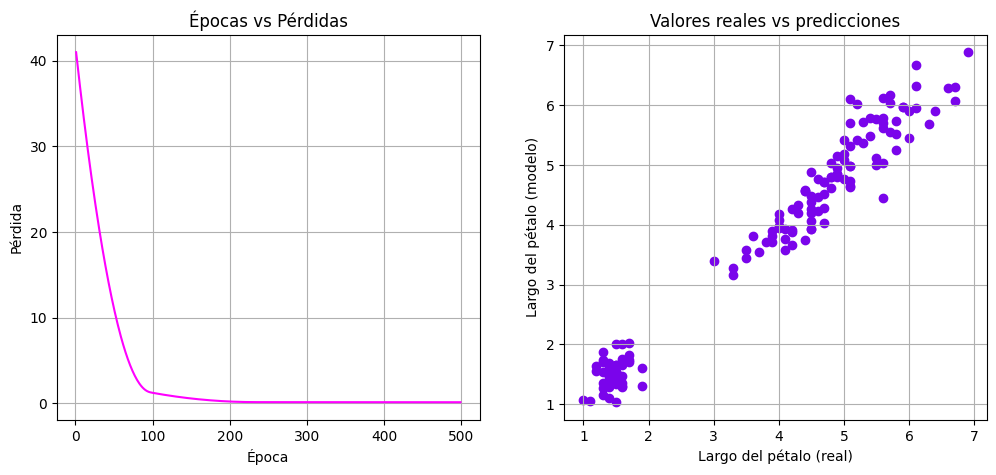

In [257]:
morado = "#7a04eb"
verde = "#7fff00"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

axes[0].set_title("Épocas vs Pérdidas")
axes[0].plot(epocas, perdidas, color = "magenta")
axes[0].set_xlabel("Época")
axes[0].set_ylabel("Pérdida")
axes[0].grid()

axes[1].set_title("Valores reales vs predicciones")
axes[1].scatter(y_vec, predicciones, color = morado)
axes[1].set_xlabel("Largo del pétalo (real)")
axes[1].set_ylabel("Largo del pétalo (modelo)")
axes[1].grid()


# Ahora comparamos con lo que obtiene LinearRegrsion de scikit-learn

In [252]:
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(x_matrix, y_vec)
predicciones_sklearn = modelo_sklearn.predict(x_matrix)

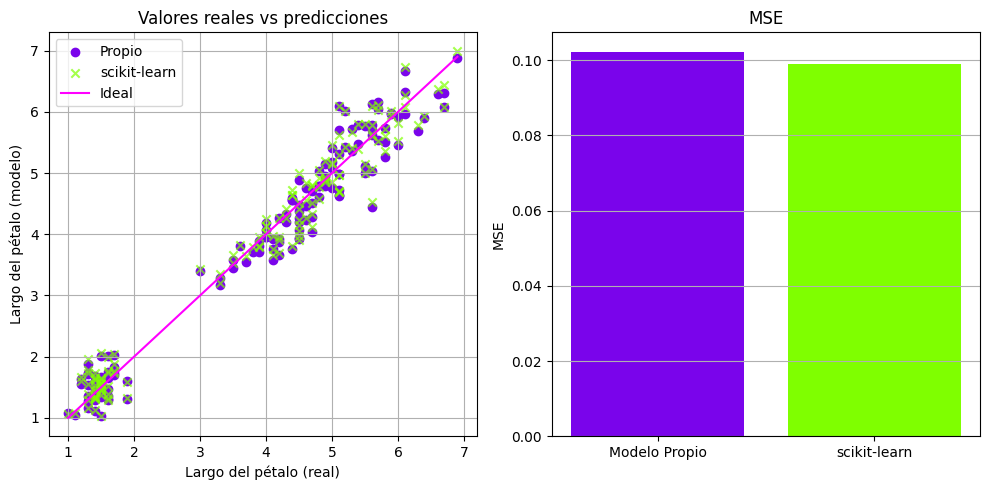

In [253]:
# Gráficas de comparación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Valores reales vs predicciones")
plt.scatter(y_vec, predicciones, color = morado, label="Propio", alpha=1)
plt.scatter(y_vec, predicciones_sklearn, color = verde, label="scikit-learn", alpha=0.7, marker='x')
plt.plot([y_vec.min(), y_vec.max()], [y_vec.min(), y_vec.max()],color = "magenta", label="Ideal")
plt.xlabel("Largo del pétalo (real)")
plt.ylabel("Largo del pétalo (modelo)")
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
mse_propio = mse(y_vec, predicciones)
mse_sklearn = mse(y_vec, predicciones_sklearn)
plt.bar(["Modelo Propio", "scikit-learn"], [mse_propio, mse_sklearn], color=[morado, verde])
plt.ylabel("MSE")
plt.title("MSE")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [254]:
print("----------------scikit-learn----------------")
print("Pesos:", modelo_sklearn.coef_)
print("Sesgo:", modelo_sklearn.intercept_)
print()
print("------------Descenso de gradiente------------")
print("Pesos:", weights[:-1])
print("Sesgo:", weights[-1])

----------------scikit-learn----------------
Pesos: [-0.64601244  1.44679341  0.72913845]
Sesgo: -0.2627111975741898

------------Descenso de gradiente------------
Pesos: [-0.54437174  1.55277355  0.6467003 ]
Sesgo: -0.25150382666050886
